**Sentiment analysis**, also known as opinion mining, is a powerful technique within natural language processing (NLP) that extracts and interprets emotions, attitudes, and subjective information from text data. In an increasingly digital world, sentiment analysis plays a crucial role in understanding public opinion, customer feedback, social media trends, and more.

My project focuses on analyzing the sentiments expressed in the reviews of the Spider-Man (2002) movie. Using Jupyter Notebook, along with the BeautifulSoup and nltk libraries, I collected reviews from IMDb, a popular movie review platform. Employing NLP techniques, I preprocessed the text to extract relevant features.

Utilizing a Support Vector Machine (SVM) classifier trained on a labeled dataset of movie reviews, I evaluated its accuracy in identifying sentiments from the Spider-Man (2002) movie reviews. By visualizing sentiment distribution through bar plots and generating word clouds, gained insights into the overall sentiment conveyed by the reviews and deepened our understanding of audience perceptions of the film.

First step is data collection. I've decided to analyse reviews of the movie "Spider-Man" from 2002. All of my resources comes from the IMDb page.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.imdb.com/title/tt0145487/reviews?ref_=tt_urv'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

reviews = []
review_elements = soup.find_all('div', class_='text show-more__control')
for element in review_elements:
    review = element.text.strip()
    reviews.append(review)

df_reviews = pd.DataFrame(reviews, columns=['Review'])


Second step is to preprocess the data, in order to do so, I will use nltk.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Tokenize
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens_lower = [token.lower() for token in tokens]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    tokens_filtered = [token for token in tokens_lower if token not in stopwords_set and token not in string.punctuation]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens_filtered)
    return preprocessed_text

df_reviews['Cleaned Review'] = df_reviews['Review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now it is time to do sentiment analysis of the reviews.

In [ ]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

nltk.download('movie_reviews')

# Load the movie reviews corpus
reviews = [(movie_reviews.raw(fileid), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
review_texts = [review[0] for review in reviews]
review_labels = [review[1] for review in reviews]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(review_texts, review_labels, test_size=0.2, random_state=42)

# Preprocess the training set
preprocessed_X_train = [preprocess_text(text) for text in X_train]

# Vectorize the preprocessed training set using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(preprocessed_X_train)

# Train a support vector machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Preprocess the test set
preprocessed_X_test = [preprocess_text(text) for text in X_test]

# Vectorize the preprocessed test set using the same vectorizer
X_test_vectorized = vectorizer.transform(preprocessed_X_test)

# Predict the sentiment labels of the test set
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the classifier
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       199
         pos       0.83      0.83      0.83       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Accuracy: 0.825


The results you obtained indicate that the sentiment analysis classifier achieved an accuracy of approximately 82.5% on the test set, which is quite good. It means that the classifier correctly predicted the sentiment of around 82.5% of the reviews in the test set.

Now, it is time to do the same, however on the scraped reviews.

In [ ]:
preprocessed_scraped_reviews = [preprocess_text(text) for text in df_reviews['Review']]
scraped_reviews_vectorized = vectorizer.transform(preprocessed_scraped_reviews)
scraped_reviews_pred = svm_classifier.predict(scraped_reviews_vectorized)

df_reviews['Sentiment'] = scraped_reviews_pred
df_reviews['Sentiment'] = df_reviews['Sentiment'].map({'neg': 'Negative', 'pos': 'Positive'})


Analyzing and Visualizing the Results:

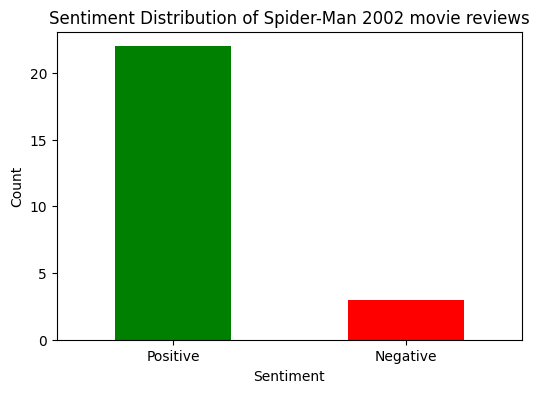

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df_reviews['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution of Spider-Man 2002 movie reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Word Cloud Visualization:

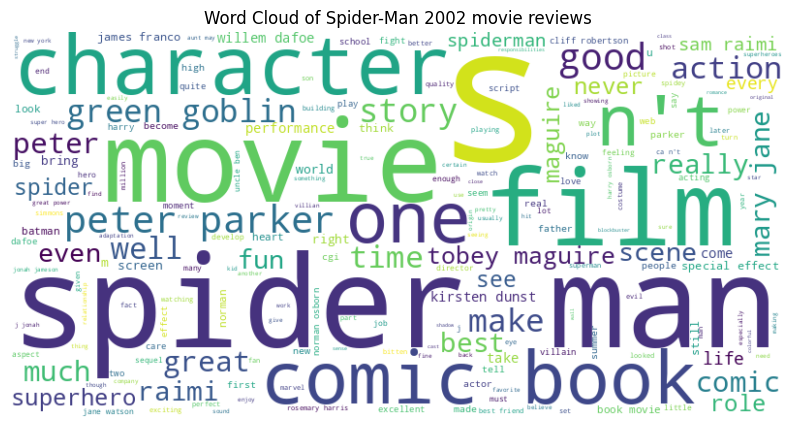

In [ ]:
from wordcloud import WordCloud

# Concatenate all cleaned reviews into a single string
all_reviews_text = ' '.join(df_reviews['Cleaned Review'])

# Generate a word cloud from the cleaned reviews text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Spider-Man 2002 movie reviews')
plt.axis('off')
plt.show()


**In conclusion**, our project utilized sentiment analysis techniques to uncover the emotions and opinions expressed in the Spider-Man (2002) movie reviews. Through the application of NLP and machine learning, we accurately classified the sentiments as positive or negative.

Our findings revealed an overall positive sentiment towards the film, with the majority of reviews expressing satisfaction and appreciation for the movie's storyline, visual effects, and character development. However, there were a few negative reviews highlighting certain aspects that fell short of expectations.

The sentiment analysis provided valuable insights into the audience's perceptions of the Spider-Man (2002) movie, allowing us to assess its reception and understand the factors influencing sentiment. This project demonstrates the effectiveness of sentiment analysis in uncovering sentiments from textual data and its potential for informing decision-making processes in various domains.